In [1]:
# imports
import plotly.express as px
import plotly.graph_objects as go
import gzip
import math
import os
import pandas as pd

# attempt 1: groupby

In [6]:
# Open gzipped file
chr1_df = pd.read_csv("test_data/m64386e_230614_195306.coverage.chr1.regions.bed.gz", delimiter="\\t", names=['contig','start','stop','depth'], engine="python")
chr2_df = pd.read_csv("test_data/m64386e_230614_195306.coverage.chr2.regions.bed.gz", delimiter="\\t", names=['contig','start','stop','depth'], engine="python")

In [75]:
# test .bed.gz files are stored here
directory = "test_data"

# only looking for .bed.gz files
ext = (".bed.gz")

# set up dictionary for each bed DF
# beds = {}

fig = go.Figure()

# iterate over each bed.gz in test_data folder
for file in os.listdir(directory):

    if file.endswith(ext):

        # reading current .bed.gz file
        f = os.path.join(directory, file)
        print(f)

        # create DataFrame per .bed.gz
        bed_df = pd.read_csv(f, delimiter="\\t", names=["contig", "start", "stop", "depth"], engine="python")
        
        # downsample each DataFrame to 1000 "bins"
        bed_downsampled = bed_df.groupby(bed_df.index // 1000).sum()[:-1]

        # create line traces for current downsampled bed file
        name = bed_downsampled["contig"][0]

        fig = fig.add_trace(go.Scatter(
        x = bed_downsampled["stop"],
        y = bed_downsampled["depth"],
        name = name
        ))

fig.show()

KeyboardInterrupt: 

In [40]:
# ---- data preprocessing ----

# downsample
chr1_df.index // 100
chr1_downsampled = chr1_df.groupby(chr1_df.index // 100).sum()[:-1]
chr2_df.index // 100
chr2_downsampled = chr2_df.groupby(chr2_df.index // 100).sum()[:-1]

# create dict of dfs
dfs = {"chr1_downsampled":chr1_downsampled, "chr2_downsampled":chr2_downsampled}


In [48]:
chr1_df.groupby(chr1_df.index // 100).sum()[:-1]

,contig,start,stop,depth
0,chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1ch...,2475000,2525000,0.00
1,chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1ch...,7475000,7525000,0.00
2,chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1ch...,12475000,12525000,2.32
3,chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1ch...,17475000,17525000,97.06
4,chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1ch...,22475000,22525000,100.00
...,...,...,...,...
4974,chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1ch...,24872475000,24872525000,243.24
4975,chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1ch...,24877475000,24877525000,37.35
4976,chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1ch...,24882475000,24882525000,5.21
4977,chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1chr1ch...,24887475000,24887525000,20.22


In [51]:
chr1_df

,contig,start,stop,depth
0,chr1,0,500,0.0
1,chr1,500,1000,0.0
2,chr1,1000,1500,0.0
3,chr1,1500,2000,0.0
4,chr1,2000,2500,0.0
...,...,...,...,...
497908,chr1,248954000,248954500,0.0
497909,chr1,248954500,248955000,0.0
497910,chr1,248955000,248955500,0.0
497911,chr1,248955500,248956000,0.0


In [72]:
nbins = 1000
chr1_min = chr1_df["start"].min()
chr1_max = chr1_df["stop"].max()
bin_width = int((chr1_max-chr1_min)/nbins)
print(bin_width)
bins = np.arange(chr1_min, chr1_max+1, bin_width)
values = np.zeros(len(bins)) # preallocation
values

248956


array([0., 0., 0., ..., 0., 0., 0.])

In [73]:
for _, row in chr1_df.iterrows():
    avg = (row["stop"]+row["start"])/2
    idx = int(np.floor(avg/bin_width))
    values[idx]+=row["depth"]

KeyboardInterrupt: 

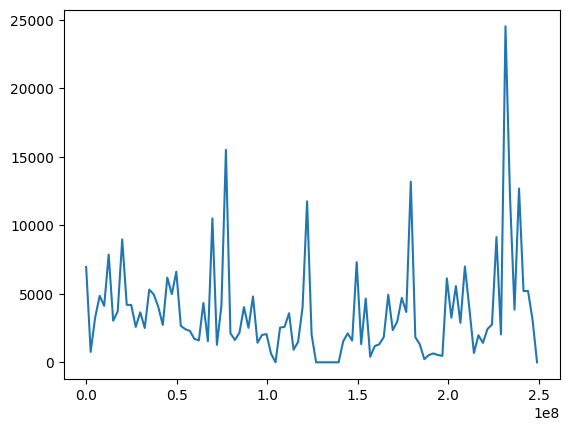

In [69]:
plt.plot(bins,values)
# overview - grid of non-interactive plots
# concatenated plot (horizontal) - horizontal x-offset using last position/nbins of each - alternate colors - scatter plot
# same bin width based on size of genome (10,000+? hg, ~1,000 ml)

C:\Users\bknight\AppData\Local\Temp\ipykernel_10056\2019392792.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



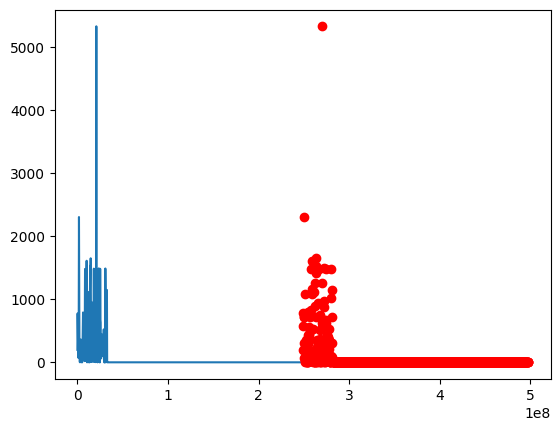

In [75]:
fig, ax = plt.subplots(1,1)
ax.plot(bins, values)
ax.plot(bins+max(bins), values, "or")
fig.show()

In [11]:
chr2_df["depth"].max()

399.61

# attempt 2: manual binning

In [49]:
#bed_df = np.genfromtxt(f, delimiter='\t', dtype = None, names=["contig", "start", "stop", "depth"], encoding="UTF-8")
bed_df = pd.read_csv(f, delimiter="\\t", names=["contig", "start", "stop", "depth"], engine="python")
#bed_df = pd.DataFrame(bed_df)
#bed_df.head()

Testing manual binning technique for one file at a time.

In [109]:
# create empty np array
#test = np.empty(shape=(2,), dtype=None)
#test = pd.DataFrame(columns={"stop", "depth"})

# debug
debug = 1

# get file name
f = "../test_data/m64386e_230614_195306.coverage.chr2.regions.bed.gz"

# create DataFrame per .bed.gz
bed_df = pd.read_csv(f, delimiter="\\t", names=["contig", "start", "stop", "depth"], engine="python")

# set up bins
chr1_min = bed_df["start"].min()
chr1_max = bed_df["stop"].max()
bin_width = 10000
bins = np.arange(chr1_min, chr1_max+1, bin_width)
values = np.zeros(len(bins)) # preallocation

# populate bins
for _, row in bed_df.iterrows():
    avg = (row["stop"]+row["start"])/2
    index = int(np.floor(avg/bin_width))
    values[index]+=row["depth"]

if(debug == 0):
    print("0")
    result = pd.DataFrame({"stop": bins, "depth": values})
    test = test.append(result)
else:
    print("1")
    result = pd.DataFrame({"stop": bins+max(bins)+bin_width, "depth": values})
    test = test.append(result)
    
#result = pd.DataFrame({"stop":bins+max(bins), "depth":values})
#test = test.append(result)
test = test.reset_index().drop("index", axis=1)
len(test)
# 24896 - Chr 1


1


49116

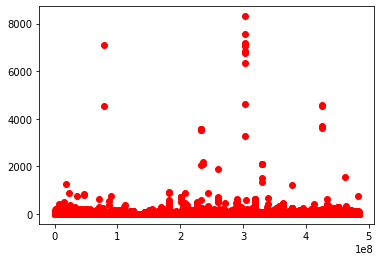

In [111]:
fig, ax = plt.subplots(1,1)
ax.plot(test["stop"], test["depth"], "or")

Testing manual binning technique on simple data to demonstrate algorithm

In [104]:
vals = np.arange(0,50,10)
width = 10
print(vals)
orig = pd.DataFrame(columns=["x", "y"])
x = pd.DataFrame({"x": vals, "y": [1, 2, 3, 4, 5]})
x2 = pd.DataFrame({"x": vals+max(vals)+width, "y": [6, 7, 8, 9, 10]})
orig = orig.append(x)
orig = orig.append(x2).reset_index().drop("index",axis=1)
orig

[ 0 10 20 30 40]


,x,y
0,0,1
1,10,2
2,20,3
3,30,4
4,40,5
5,50,6
6,60,7
7,70,8
8,80,9
9,90,10


Final (working) function to accomplish manual binning

In [148]:
# Function to go through each .bed.gz file, iterate through it and bin it, and append it
# to a larger table which is plotted later.
def create_plot_v2(directory, bin_width):

    # only looking for .bed.gz files
    ext = (".bed.gz")

    # Set up DF to hold all data
    beds = pd.DataFrame(columns={"stop", "depth"})

    # debug -- try 2 files first
    file_list = os.listdir(directory)
    dir_len = len(file_list)
    print(f"Files to be plotted: {file_list}")

    # Iterate over each bed.gz in test_data folder
    for idx, file in enumerate(file_list):

        if file.endswith(ext):
            # Reading current .bed.gz file
            f = os.path.join(directory, file)
            print(f"\n{idx} Current file: {f}")

            # Create DataFrame per .bed.gz
            bed_df = pd.read_csv(f, delimiter="\\t", names=["contig", "start", "stop", "depth"], engine="python")
            
            # Get bins
            print("Getting bins...")
            start_min = bed_df["start"].min()
            stop_max = bed_df["stop"].max()
            bins = np.arange(start_min, stop_max+1, bin_width)
            values = np.zeros(len(bins)) 
            print(f"Max Pos: {stop_max}")

            # Iterrate through each DataFrame and populate bins
            print("Populating bins...")
            for _, row in bed_df.iterrows():
                avg = (row["stop"]+row["start"])/2
                index = int(np.floor(avg/bin_width))
                values[index]+=row["depth"]

            # Append new data to DF
            print("Appending data...")
            if(idx == 0):
                print(f"{idx} == 0")
                result = pd.DataFrame({"stop":bins, "depth":values})
            else:
                print(f"{idx} =/= 0")
                print(bins)
                print(bins+max(beds["stop"]))
                result = pd.DataFrame({"stop":bins+max(beds["stop"]), "depth":values})
            beds = beds.append(result)
            print(beds.tail())
                    
            print(f"{idx+1}/{dir_len} files completed!")
            
    # Fix index and plot final data
    beds = beds.reset_index().drop("index", axis=1)
    #ax.plot(beds["stop"], beds["depth"], "or")
    return beds

Files to be plotted: ['m64386e_230614_195306.coverage.chr1.regions.bed.gz', 'm64386e_230614_195306.coverage.chr2.regions.bed.gz']

0 Current file: ../test_data/m64386e_230614_195306.coverage.chr1.regions.bed.gz
Getting bins...
Max Pos: 248956422
Populating bins...
Appending data...
0 == 0
       depth       stop
24891   7.88  248910000
24892   0.00  248920000
24893   0.39  248930000
24894   1.85  248940000
24895   0.00  248950000
1/2 files completed!

1 Current file: ../test_data/m64386e_230614_195306.coverage.chr2.regions.bed.gz
Getting bins...
Max Pos: 242193529
Populating bins...
Appending data...
1 =/= 0
[        0     10000     20000 ... 242170000 242180000 242190000]
[248950000 248960000 248970000 ... 491120000 491130000 491140000]
       depth       stop
24215   0.31  491100000
24216  22.40  491110000
24217  11.38  491120000
24218   0.00  491130000
24219   0.00  491140000
2/2 files completed!


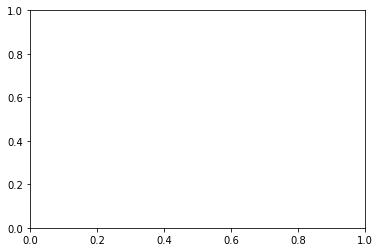

In [140]:
# plotting data created from iterating through all bed.gz files
beds2 = create_plot_v2("../test_data/")

Files to be plotted: ['m64386e_230614_195306.coverage.chr1.regions.bed.gz', 'm64386e_230614_195306.coverage.chr2.regions.bed.gz', 'm64386e_230614_195306.coverage.chr3.regions.bed.gz', 'm64386e_230614_195306.coverage.chr4.regions.bed.gz', 'm64386e_230614_195306.coverage.chr5.regions.bed.gz', 'm64386e_230614_195306.coverage.chr6.regions.bed.gz', 'm64386e_230614_195306.coverage.chr7.regions.bed.gz', 'm64386e_230614_195306.coverage.chr8.regions.bed.gz', 'm64386e_230614_195306.coverage.chr9.regions.bed.gz']
0 Current file: ../test_data/m64386e_230614_195306.coverage.chr1.regions.bed.gz
Getting bins...
Max Pos: 248956422
Populating bins...
0 == 0
1 Current file: ../test_data/m64386e_230614_195306.coverage.chr2.regions.bed.gz
Getting bins...
Max Pos: 242193529
Populating bins...
1 =/= 0
2 Current file: ../test_data/m64386e_230614_195306.coverage.chr3.regions.bed.gz
Getting bins...
Max Pos: 198295559
Populating bins...
2 =/= 0
3 Current file: ../test_data/m64386e_230614_195306.coverage.chr4.re

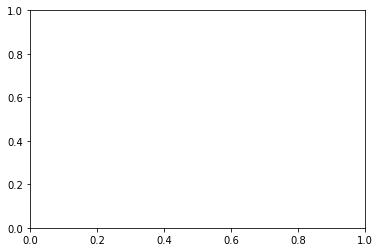

In [118]:
# first attempt using create_plot_v2, just has fewer debug print statements
beds1 = create_plot_v2("../test_data/")

C:\Users\britk\AppData\Local\Temp/ipykernel_7972/2225958772.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



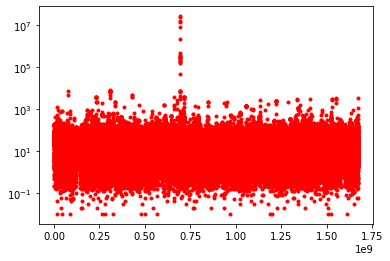

In [156]:
# first attempt plotting full data from create_plots_v2
fig, ax = plt.subplots(1,1)
ax.plot(beds1["stop"], beds1["depth"], ".r")
ax.set_yscale("log")
fig.show()

In [154]:
len(beds1)

167492

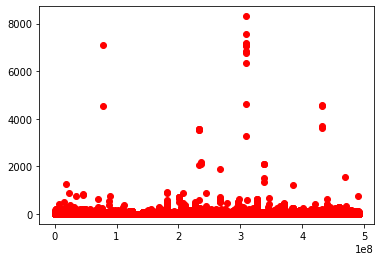

In [143]:
# second attempt using create_plots_v2 data on just two files for debugging purposes
fig, ax = plt.subplots(1,1)
ax.plot(beds2["stop"], beds2["depth"], "or")

In [146]:
max(beds2["depth"])

8310.380000000001

In [125]:
len(beds1)

167492

Files to be plotted: ['m64386e_230614_195306.coverage.chr1.regions.bed.gz', 'm64386e_230614_195306.coverage.chr2.regions.bed.gz', 'm64386e_230614_195306.coverage.chr3.regions.bed.gz', 'm64386e_230614_195306.coverage.chr4.regions.bed.gz', 'm64386e_230614_195306.coverage.chr5.regions.bed.gz', 'm64386e_230614_195306.coverage.chr6.regions.bed.gz', 'm64386e_230614_195306.coverage.chr7.regions.bed.gz', 'm64386e_230614_195306.coverage.chr8.regions.bed.gz', 'm64386e_230614_195306.coverage.chr9.regions.bed.gz']

0 Current file: ../test_data\m64386e_230614_195306.coverage.chr1.regions.bed.gz
Getting bins...
Max Pos: 248956422
Populating bins...
Appending data...
0 == 0
       depth       stop
49787   0.39  248935000
49788   1.85  248940000
49789   0.00  248945000
49790   0.00  248950000
49791   0.00  248955000
1/9 files completed!

1 Current file: ../test_data\m64386e_230614_195306.coverage.chr2.regions.bed.gz
Getting bins...
Max Pos: 242193529
Populating bins...
Appending data...
1 =/= 0
[     

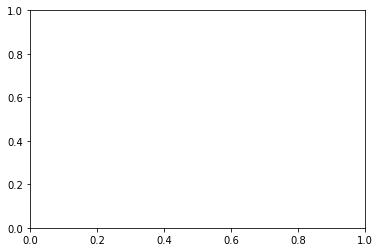

In [152]:
# attempting with smaller bin size (5000)
beds3 = create_plot_v2("../test_data", 5000)

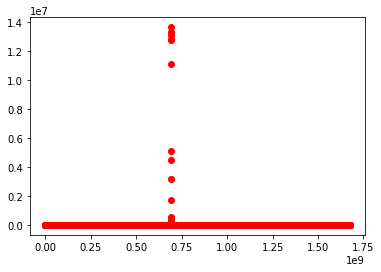

In [153]:
# plotting same data with more bins
fig, ax = plt.subplots(1,1)
ax.plot(beds3["stop"], beds3["depth"], "or")

# attempt 3: plotting in loop
with vertical offset rather than continuous coverage plotting

In [41]:
fig = go.Figure()
for i in dfs:
    fig = fig.add_trace(go.Scatter(
        x = dfs[i]["stop"],
        y = dfs[i]["depth"],
        name = i
    ))
fig.show()

In [38]:
fig = go.Figure()

# add offset to additional traces for readability
for idx, df in enumerate(dfs):
    offset = idx*15000
    
    y_values = dfs[df]["depth"]+offset

    fig = fig.add_trace(go.Scatter(
        x = dfs[df]["stop"],
        y = y_values,
        name = df
    ))
fig.show()

In [9]:
print(str(len(chr1_df))+" "+str(len(chr2_df)))

497913 484388


In [59]:
chr1_df.head()

,contig,start,stop,chr2
0,chr2,0,500,0.0
1,chr2,500,1000,0.0
2,chr2,1000,1500,0.0
3,chr2,1500,2000,0.0
4,chr2,2000,2500,0.0


In [51]:
chr1_df['chr2_depth'] = chr2_df['depth']

In [53]:
chr1_df.tail(100)

,contig,start,stop,depth,chr2_depth
484288,chr2,242144000,242144500,0.93,0.93
484289,chr2,242144500,242145000,0.41,0.41
484290,chr2,242145000,242145500,0.00,0.00
484291,chr2,242145500,242146000,0.00,0.00
484292,chr2,242146000,242146500,0.00,0.00
...,...,...,...,...,...
484383,chr2,242191500,242192000,0.00,0.00
484384,chr2,242192000,242192500,0.00,0.00
484385,chr2,242192500,242193000,0.00,0.00
484386,chr2,242193000,242193500,0.00,0.00


In [10]:
print(df[df['cov'] != 0])

       chromosome  start_pos    end_pos   cov
88           chr2      44000      44500  0.52
436          chr2     218000     218500  1.41
437          chr2     218500     219000  2.00
438          chr2     219000     219500  2.00
439          chr2     219500     220000  2.00
...           ...        ...        ...   ...
484347       chr2  242173500  242174000  1.00
484348       chr2  242174000  242174500  1.00
484349       chr2  242174500  242175000  1.00
484350       chr2  242175000  242175500  1.00
484351       chr2  242175500  242176000  0.38

[134503 rows x 4 columns]


In [67]:
# try histogram for first 300 bins
trim_df = df.head(500)
nbins = math.floor(len(trim_df)/2)
print(nbins)
fig = px.histogram(trim_df, x="stop", y="coverage", nbins=150, color="coverage", color_discrete_sequence=px.colors.sequential.Blues,
        labels={"stop":"End Position (bp)", "coverage":"Depth"}, width=600)

fig.layout.update(showlegend=False, yaxis_title="Depth")
fig.show()
fig_html = fig.to_html()

250


In [68]:
# try histogram for first 300 bins
trim_df = df.head(500)
nbins = len(trim_df)
print(nbins)
fig = px.histogram(trim_df, x="stop", y="coverage", nbins=nbins, color="coverage", color_discrete_sequence=px.colors.sequential.Blues,
        labels={"stop":"End Position (bp)", "coverage":"Depth"}, width=600)

fig.layout.update(showlegend=False, yaxis_title="Depth")
fig.show()
fig_html = fig.to_html()

500


In [28]:
    with open('templates/coverage_plot.html', mode='w+', encoding="utf-8") as f:
        f.write(fig_html)

In [22]:
# 221500
print(df[df["stop"]==221500])

    contig   start    stop  coverage
442   chr2  221000  221500       2.0


In [4]:
df.tail(100)

,chromosome,start_pos,end_pos,depth
484288,chr2,242144000,242144500,0.93
484289,chr2,242144500,242145000,0.41
484290,chr2,242145000,242145500,0.00
484291,chr2,242145500,242146000,0.00
484292,chr2,242146000,242146500,0.00
...,...,...,...,...
484383,chr2,242191500,242192000,0.00
484384,chr2,242192000,242192500,0.00
484385,chr2,242192500,242193000,0.00
484386,chr2,242193000,242193500,0.00


In [ ]:
# try scatter plot
trim_df = (df.head(300))
fig = px.line(df, x="start", y="depth")
fig.show()

In [36]:
# downsampling attempt 1 -- eventually automate for all files
chr1_df.index // 10000
chr1_downsampled = chr2_df.groupby(df.index // 10000).sum()
chr2_df.index // 10000
chr2_downsampled = chr2_df.groupby(df.index // 10000).sum()

In [41]:
len(downsampled)
fig = px.line(chr1_downsampled[:-1], x="start", y="depth")
fig.add_hline(chr2_downsampled[:-1], x="start", y="depth")
fig.show()

TypeError: add_hline() got multiple values for argument 'y'